In [1]:
from soft_info import save_plot, apply_formatting
import matplotlib.pyplot as plt
import pickle




In [2]:
import numpy as np

DEVICE = 'ibm_sherbrooke'
ROUNDS = 100
threshold = 0.01

def get_cols_of_round(round_num, d, T):
    '''Indexing starts at 0'''
    assert round_num < T
    return list(range(round_num*(d-1), (round_num+1)*(d-1)))

n_leakeds = []
for LOGICAL in ['0', '1']:
    for XBASIS in [True, False]:
        file_name = f"../results/Leakage/Correct_{DEVICE}_{LOGICAL}_{XBASIS}_{ROUNDS}.pkl"
        with open(file_name, 'rb') as f:
            (pSofts, countMats, estim0Mats, estim1Mats, inverted_q_maps, big_memories) = pickle.load(f)
        n_leaked = []
        pSoft = np.vstack(pSofts)
        countMat = np.vstack(countMats)
        estim0Mat = np.vstack(estim0Mats)
        estim1Mat = np.vstack(estim1Mats)
        
        d = int((pSoft.shape[1] + ROUNDS) / (ROUNDS + 1))
        print(f"d = {d}")
        n_leaked = []
        for T in range(ROUNDS):
            round_cols = get_cols_of_round(T, d, ROUNDS)
            pSoft_round = pSoft[:, round_cols]
            estim0Mat_round = estim0Mat[:, round_cols]
            estim1Mat_round = estim1Mat[:, round_cols]
            # IQ_data_round = big_memory[:, round_cols]
            mask_round = ((estim0Mat_round < threshold) & (estim1Mat_round < threshold))

            n_leaked.append(mask_round.sum()/mask_round.size)
        n_leakeds.append(n_leaked)




d = 52
d = 52
d = 52
d = 52


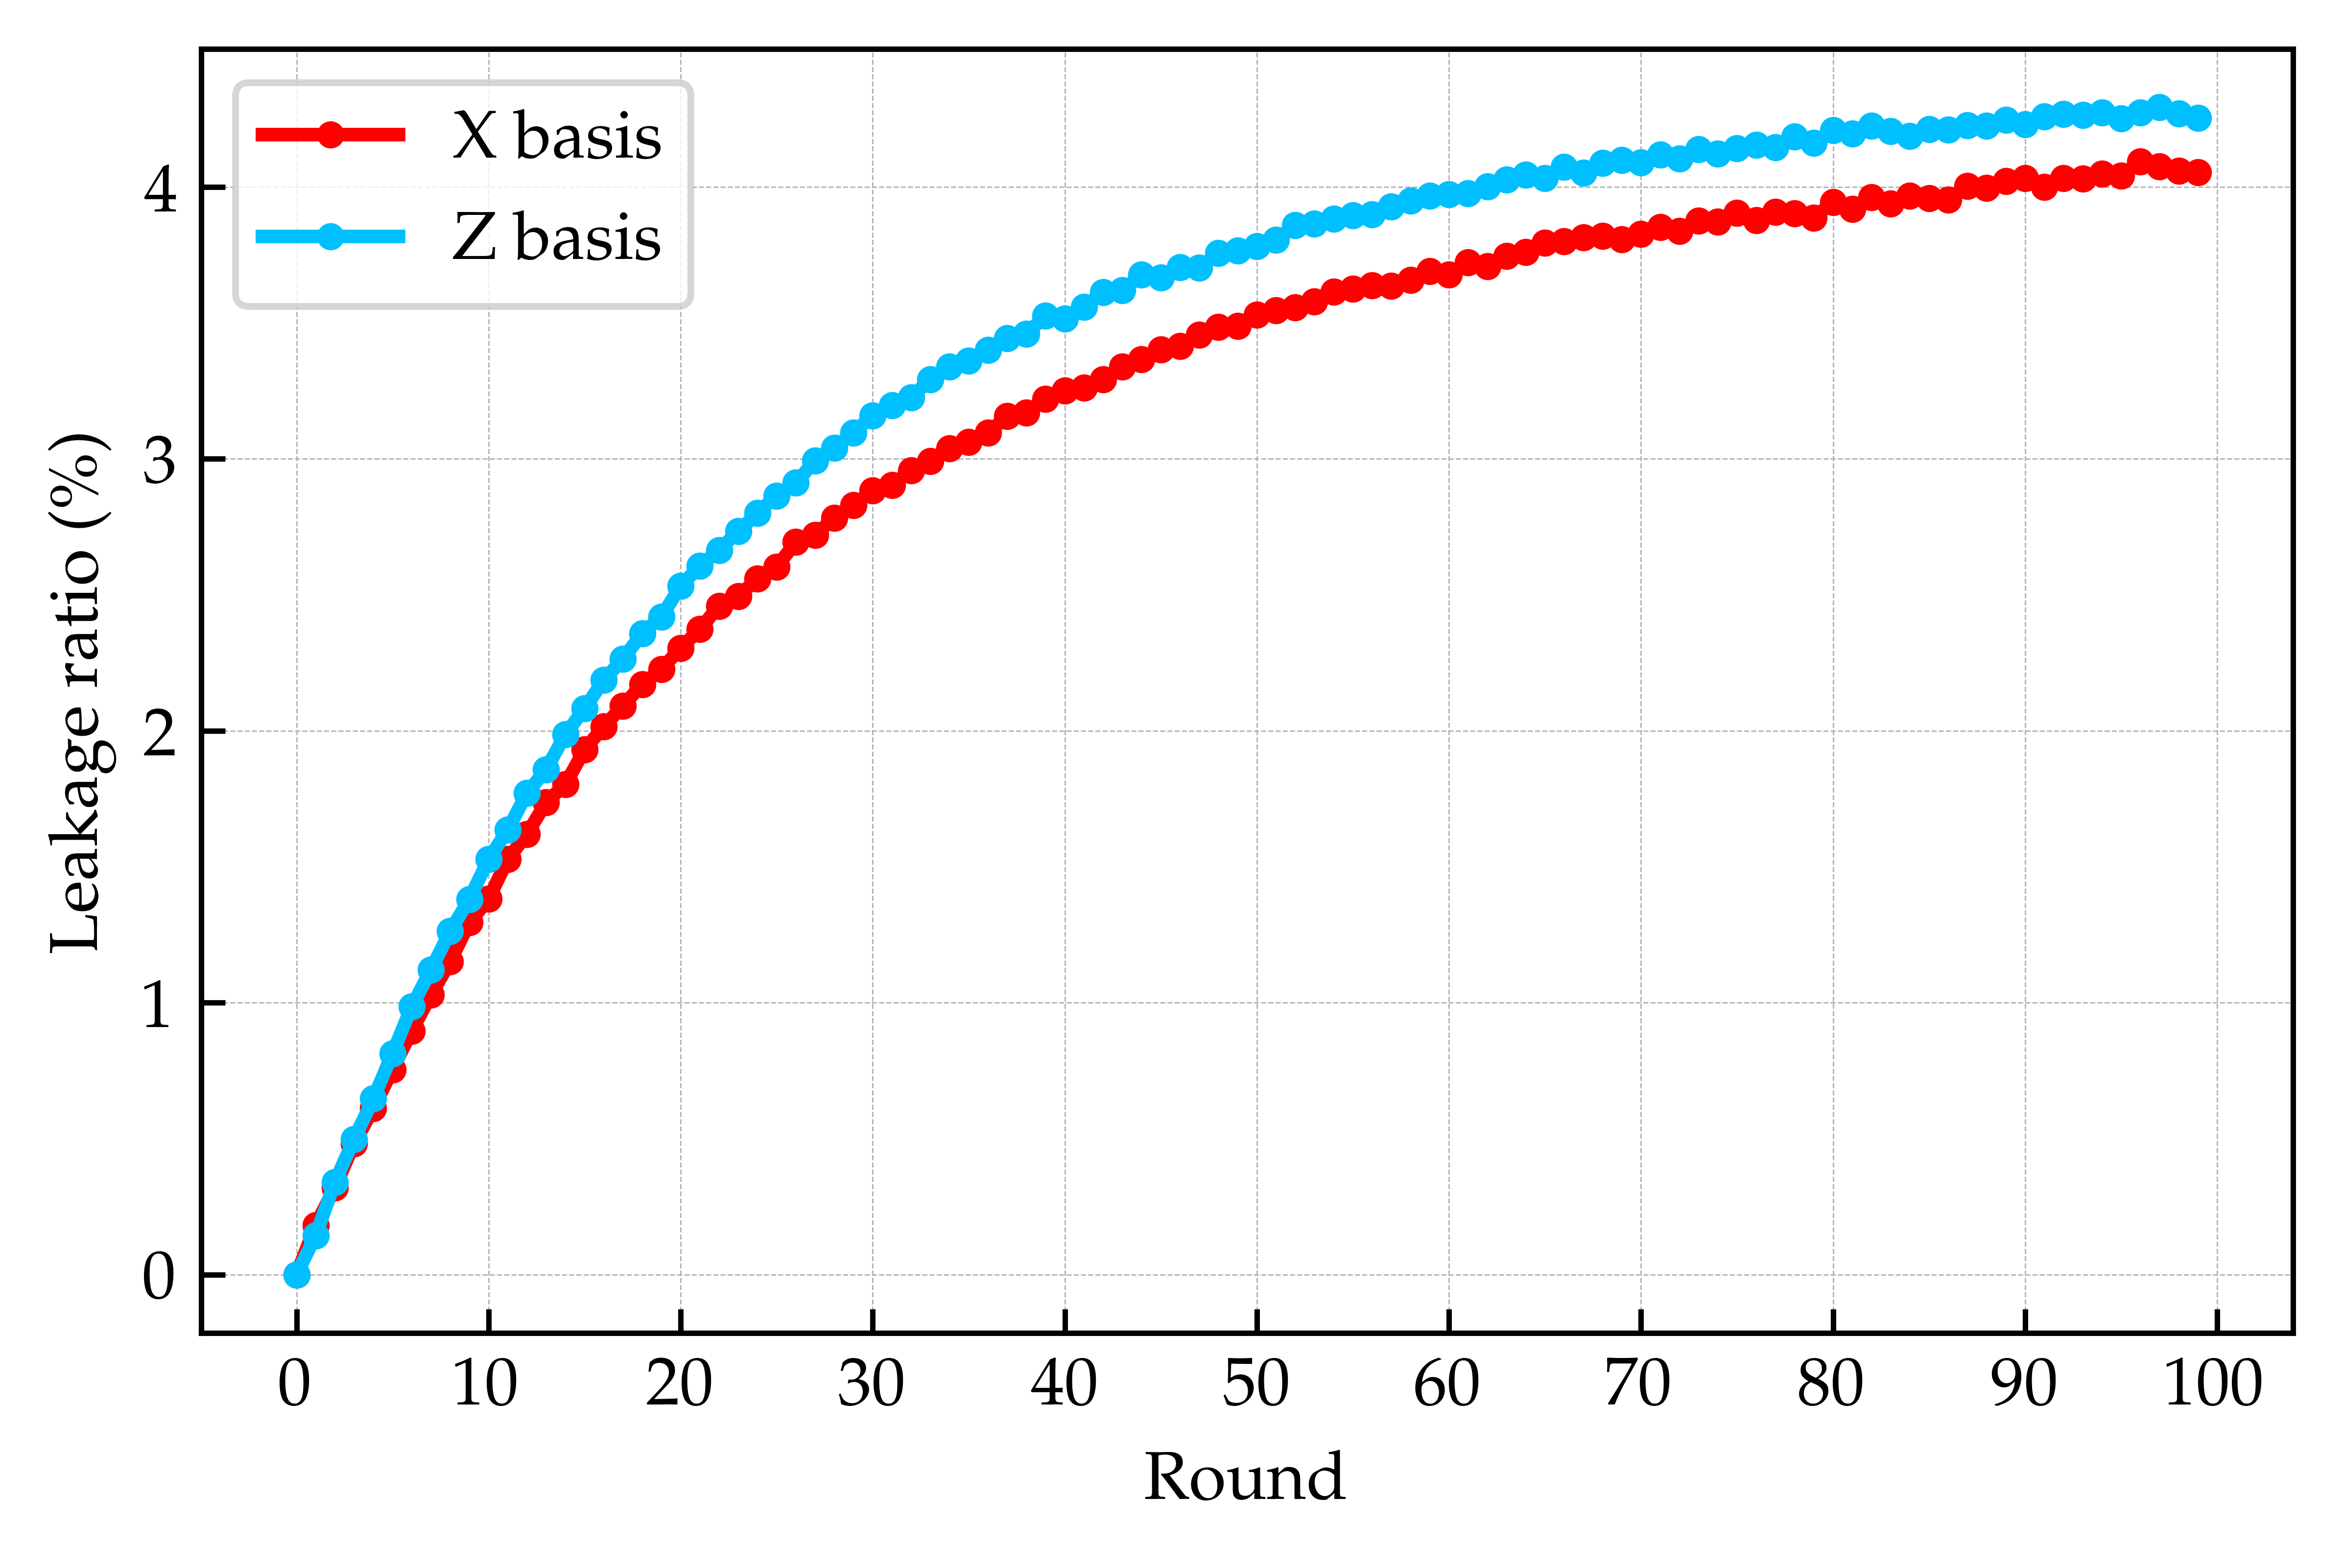

In [3]:
import matplotlib.pyplot as plt


apply_formatting()
fig = plt.figure()
# colors = ['red', 'midnightblue', 'red', 'midnightblue']
# markers = ['o', 'o', 'd', 'd']
# for n_leaked, color, marker in zip(n_leakeds, colors, markers):
#     n_leaked = np.array(n_leaked) * 100
#     plt.plot(n_leaked-n_leaked[0], marker=marker, linewidth=2, markersize=3, color=color)

n_leaked_X = np.mean([n_leakeds[0], n_leakeds[2]], axis=0) * 100
n_leaked_Z = np.mean([n_leakeds[1], n_leakeds[3]], axis=0) * 100
plt.plot(n_leaked_X-n_leaked_X[0], marker='o', linewidth=2, markersize=3, color='red', label='X basis')
plt.plot(n_leaked_Z-n_leaked_Z[0], marker='o', linewidth=2, markersize=3, color='deepskyblue', label='Z basis')

plt.xlabel('Round')
plt.xticks(range(0, T+10, 10))
plt.ylabel('Leakage ratio (\%)')
plt.grid(True, which="both", linestyle='--', linewidth=0.2)
plt.legend(loc='best', fontsize=10)
save_plot(fig, '4_RepetitionCodes/leakage_vs_rounds.pdf', format='pdf')